# Bank marketing data

- Visit the [Bank marketing website](https://archive-beta.ics.uci.edu/dataset/222/bank+marketing)
- Click the download button
- Unzip the file
- Save the file called bank-full.csv to the same folder where this notebook is
- Follow the guidelines below to prepare the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("bank-full.csv", sep=";")

data.replace({"y": {"no":0, "yes":1}}, inplace=True)

varnames = list(data.columns.str.strip())
varnames[-1] = "subscribe"

data.columns = varnames

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [3]:
data.shape

(45211, 17)

In [4]:
predictors = data.columns.to_list()
predictors.remove("subscribe")
predictors.remove("education")
predictors

['age',
 'job',
 'marital',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [5]:
# add missing values at random

for i in range(10):
    frac = np.random.uniform(0,0.2)
    col = data[predictors].sample(1, axis=1).columns[0]
    
    nanidx = data.sample(frac=frac).index
    data.loc[nanidx, col] = np.NaN

In [6]:
# check nan

cols_nan = [c for c in data.columns if data[c].isnull().any()]

data[cols_nan].isnull().mean()

job         0.010219
balance     0.083519
contact     0.102763
day         0.018137
duration    0.087943
campaign    0.207450
pdays       0.162195
poutcome    0.037225
dtype: float64

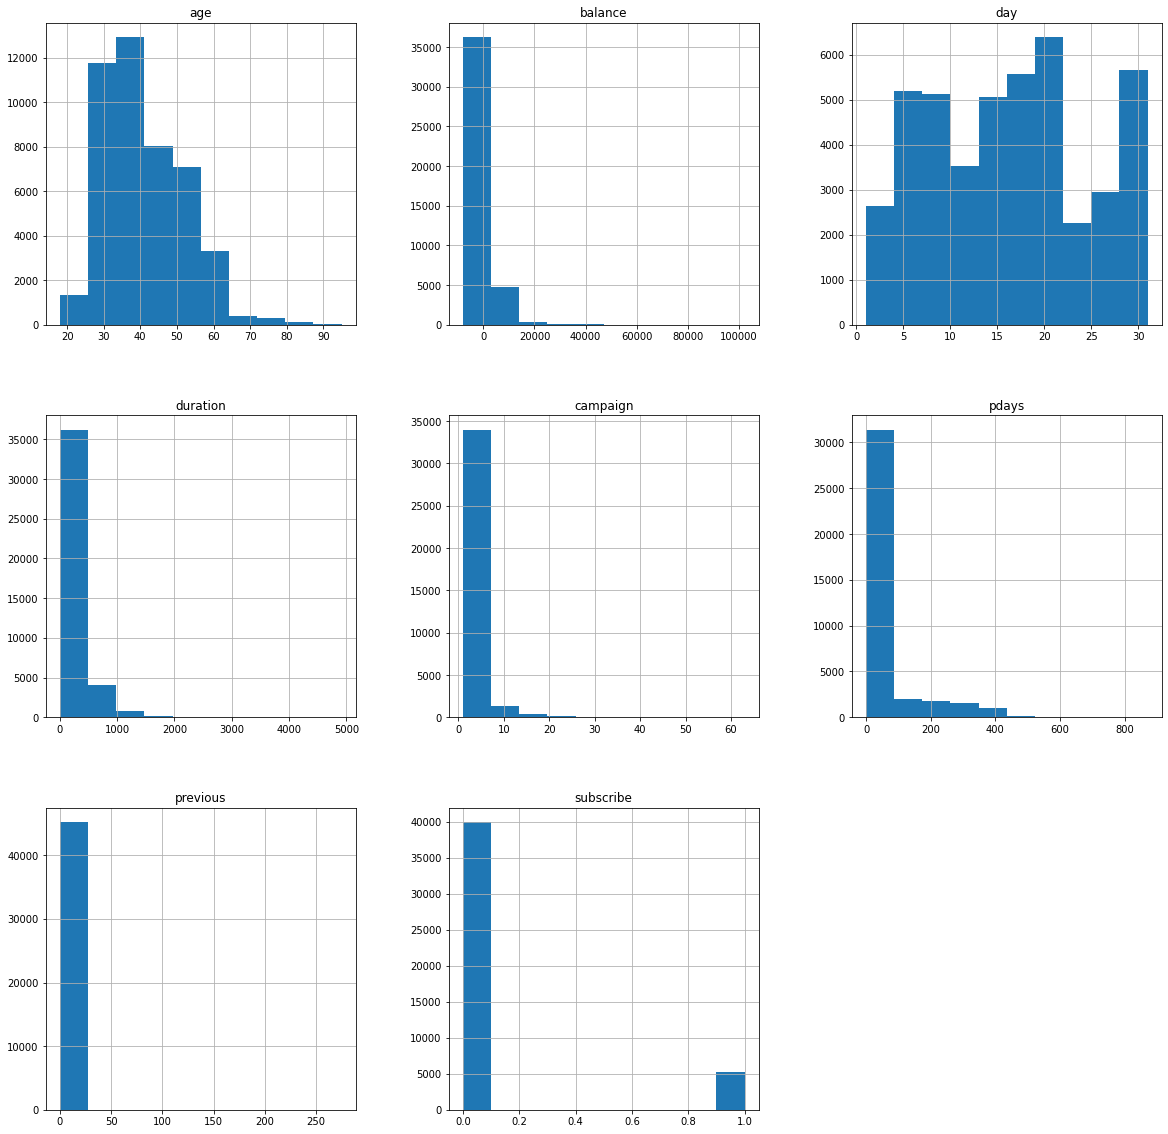

In [7]:
# Numerical variables

data.hist(figsize=(20,20))
plt.show()

In [8]:
cat_vars = [c for c in predictors if data[c].dtype == "O"]
cat_vars

['job',
 'marital',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

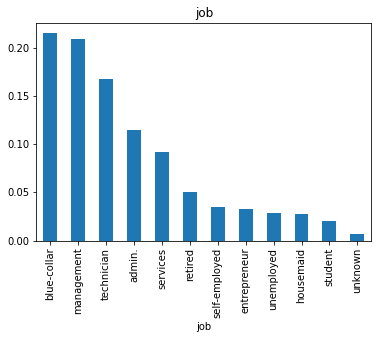

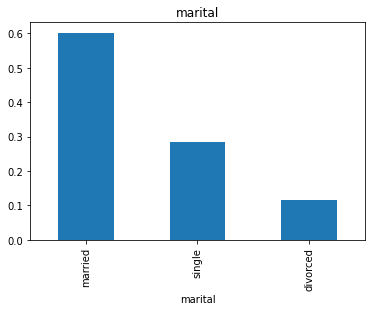

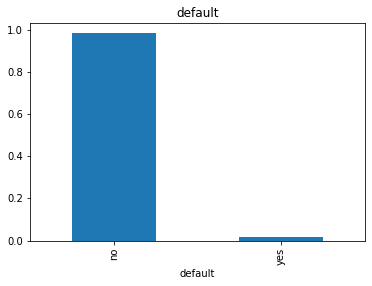

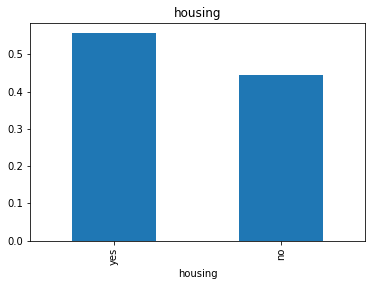

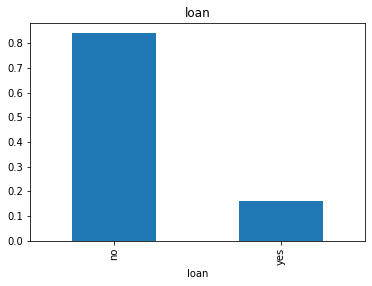

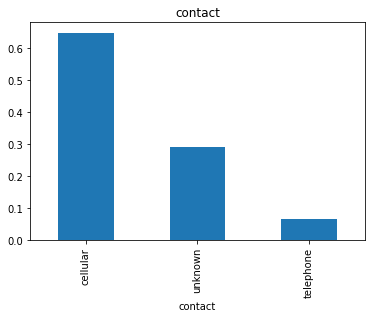

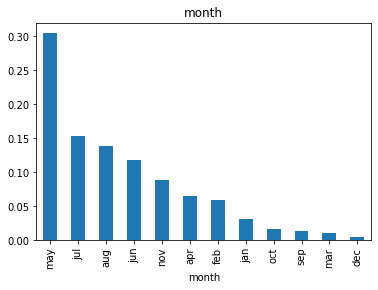

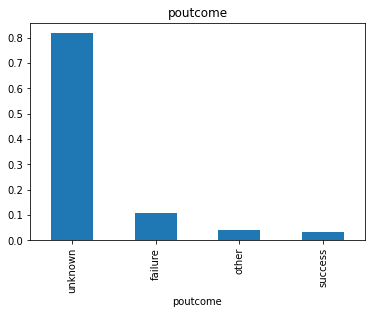

In [9]:
for var in cat_vars:
    data[var].value_counts(normalize=True).plot.bar()
    plt.title(var)
    plt.show()

In [10]:
data.to_csv("../bank-marketing.csv", index=False)

In [11]:
data=pd.read_csv("../bank-marketing.csv")

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0,unknown,0
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0,unknown,0
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,NaN,-1.0,0,unknown,0
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0,unknown,0
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0,unknown,0
